In [1]:
#meta 11/12/2020 Moa from scratch

#here Load Data
#copy notebook Fastai Tabular Data
#not competing, still learning my way around Kaggle

In [2]:
from fastai.tabular.data import *
#from fastai.tabular import *

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lish-moa/test_features.csv
/kaggle/input/lish-moa/train_drug.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/sample_submission.csv


## 0. Load Data

In [4]:
data_path = "/kaggle/input/lish-moa/"

In [5]:
df_drug = pd.read_csv(data_path + 'train_drug.csv')
display(df_drug.head(3))
print('train drug data size', df_drug.shape)

,sig_id,drug_id
0,id_000644bb2,b68db1d53
1,id_000779bfc,df89a8e5a
2,id_000a6266a,18bb41b2c


train drug data size (23814, 2)


In [6]:
df_drug.describe()

,sig_id,drug_id
count,23814,23814
unique,23814,3289
top,id_793d94910,cacb2b860
freq,1,1866


In [7]:
df_train = pd.read_csv(data_path + 'train_features.csv')
display(df_train.head(3))
print('train data size', df_train.shape)

df_target_ns = pd.read_csv(data_path + 'train_targets_nonscored.csv')
display(df_target_ns.head(3))
print('train target nonscored size', df_target_ns.shape)

df_target_s = pd.read_csv(data_path + '/train_targets_scored.csv')
display(df_target_s.head(3))
print('train target scored size', df_target_s.shape)

df_test = pd.read_csv(data_path + 'test_features.csv')
display(df_test.head(3))
print('test data size', df_test.shape)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931


train data size (23814, 876)


,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train target nonscored size (23814, 403)


,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train target scored size (23814, 207)


,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_0004d9e33,trt_cp,24,D1,-0.5458,0.1306,-0.5135,0.4408,1.5500,-0.1644,...,0.0981,0.7978,-0.143,-0.2067,-0.2303,-0.1193,0.0210,-0.0502,0.1510,-0.7750
1,id_001897cda,trt_cp,72,D1,-0.1829,0.2320,1.2080,-0.4522,-0.3652,-0.3319,...,-0.1190,-0.1852,-1.031,-1.3670,-0.3690,-0.5382,0.0359,-0.4764,-1.3810,-0.7300
2,id_002429b5b,ctl_vehicle,24,D1,0.1852,-0.1404,-0.3911,0.1310,-1.4380,0.2455,...,-0.2261,0.3370,-1.384,0.8604,-1.9530,-1.0140,0.8662,1.0160,0.4924,-0.1942


test data size (3982, 876)


In [8]:
from fastai.tabular import *

In [9]:
test_features = pd.read_csv('/kaggle/input/lish-moa/test_features.csv')
train_features = pd.read_csv('/kaggle/input/lish-moa/train_features.csv')
train_targets_scored = pd.read_csv('/kaggle/input/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('/kaggle/input/lish-moa/train_targets_nonscored.csv')
sample_submission = pd.read_csv('/kaggle/input/lish-moa/sample_submission.csv')

In [10]:
'''from sklearn.decomposition import PCA
pc = PCA(n_components = 500)
pc.fit(train_features[cont_columns])'''

'from sklearn.decomposition import PCA\npc = PCA(n_components = 500)\npc.fit(train_features[cont_columns])'

In [11]:
'''result_train = pd.DataFrame(pc.transform(train_features[cont_columns]))
result_test = pd.DataFrame(pc.transform(test_features[cont_columns]))
result_train[cat_names] = train_features[cat_names]
result_test[cat_names] = test_features[cat_names]

result_test['sig_id'] = test_features['sig_id']
result_train['sig_id'] = train_features['sig_id']
result_train.shape,result_test.shape'''

"result_train = pd.DataFrame(pc.transform(train_features[cont_columns]))\nresult_test = pd.DataFrame(pc.transform(test_features[cont_columns]))\nresult_train[cat_names] = train_features[cat_names]\nresult_test[cat_names] = test_features[cat_names]\n\nresult_test['sig_id'] = test_features['sig_id']\nresult_train['sig_id'] = train_features['sig_id']\nresult_train.shape,result_test.shape"

In [12]:
print(train_features.shape)
cat_names = ['cp_type','cp_time','cp_dose']
cont_columns = [i for i in train_features.columns if i not in ['cp_type','cp_time','cp_dose','sig_id']]
dep_var = [i for i in train_targets_scored.columns if i !='sig_id']
train_features[dep_var] = train_targets_scored[dep_var]
print(train_features.shape)

(23814, 876)
(23814, 1082)


In [13]:
procs = [FillMissing,Categorify,Normalize]
data = (TabularList.from_df(train_features, procs=procs, cont_names=cont_columns, cat_names=cat_names)
        .split_by_rand_pct(valid_pct=0.10,seed=42)
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(test_features, cat_names=cat_names, cont_names=cont_columns, procs=procs))
        .databunch())

In [14]:
learn = tabular_learner(data,layers=[300,200])

In [15]:
'''learn.lr_find()
learn.recorder.plot(suggestion=True)'''

'learn.lr_find()\nlearn.recorder.plot(suggestion=True)'

In [16]:
learn.fit_one_cycle(5, 3.31E-02)

epoch,train_loss,valid_loss,time
0,0.020241,0.017955,00:19
1,0.016794,0.017387,00:19
2,0.016275,0.015974,00:19
3,0.014665,0.015172,00:18
4,0.013433,0.015078,00:18


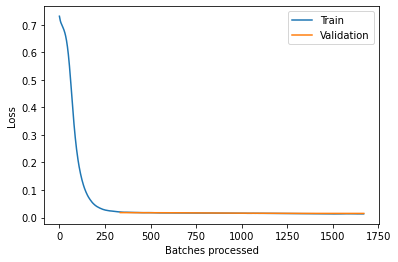

In [17]:
learn.recorder.plot_losses()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(5,slice(1e-04),wd=0.2)

epoch,train_loss,valid_loss,time
0,0.013045,0.015050,00:19
1,0.013380,0.015055,00:18
2,0.013266,0.015050,00:19
3,0.013180,0.015057,00:19
4,0.013082,0.015060,00:19


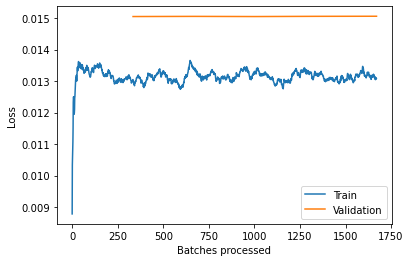

In [19]:
learn.recorder.plot_losses()

In [20]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-5),wd=0.25)

epoch,train_loss,valid_loss,time
0,0.013192,0.015045,00:19
1,0.013143,0.015042,00:19
2,0.013221,0.015049,00:19
3,0.013134,0.015036,00:18
4,0.013103,0.015051,00:19


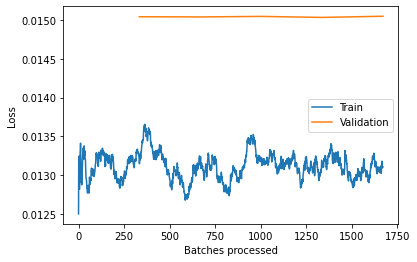

In [21]:
learn.recorder.plot_losses()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6),wd=0.4)

epoch,train_loss,valid_loss,time
0,0.012970,0.015055,00:18
1,0.012967,0.015051,00:18
2,0.013025,0.015057,00:19
3,0.012998,0.015057,00:19
4,0.013060,0.015033,00:19


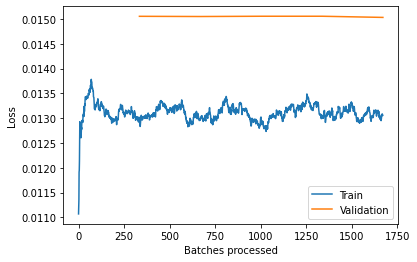

In [23]:
learn.recorder.plot_losses()

In [24]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [25]:
submission = pd.DataFrame({'sig_id':sample_submission['sig_id']})
submission[dep_var] = pd.DataFrame(preds.detach().numpy())

In [26]:
submission.loc[submission['sig_id'].isin(test_features.loc[test_features['cp_type'] =='ctl_vehicle', 'sig_id']), train_targets_scored.columns[1:]] = 0

In [27]:
submission.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.000095,0.000302,0.004986,0.024317,0.018408,0.004984,0.001897,0.012921,0.000001,...,0.001238,0.000709,0.002005,0.000569,0.000120,0.000914,0.000138,0.001831,0.019669,0.000918
1,id_001897cda,0.000003,0.000090,0.000181,0.000804,0.000426,0.000188,0.001194,0.007549,0.001515,...,0.000044,0.000509,0.000820,0.000610,0.013165,0.000029,0.006400,0.000085,0.000290,0.001593
2,id_002429b5b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,id_00276f245,0.000104,0.000148,0.000755,0.007309,0.013164,0.002811,0.007252,0.007023,0.000232,...,0.000237,0.000867,0.004226,0.005030,0.013668,0.000065,0.001263,0.001984,0.002089,0.005261
4,id_0027f1083,0.000513,0.000353,0.001016,0.010706,0.018930,0.004314,0.006532,0.001926,0.000026,...,0.000401,0.000068,0.001694,0.000562,0.000336,0.000090,0.000132,0.000745,0.000698,0.001184


In [28]:
submission.to_csv('submission.csv',index=False)